https://medium.com/@connectwithghosh/simple-autoencoder-example-using-tensorflow-in-python-on-the-fashion-mnist-dataset-eee63b8ed9f1
http://localhost:8889/?token=3e8edb98cb8f87051060a279a40ae5f7871f8501e7ed66a9&token=3e8edb98cb8f87051060a279a40ae5f7871f8501e7ed66a9

In [2]:
# Importing tensorflow
import tensorflow as tf
# Importing some more libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#loading the images
all_images = np.loadtxt('./data/autoencoder/fashion-mnist_train.csv', delimiter=',', skiprows=1)[:,1:]

#looking at the shape of the file
print(all_images.shape)

(60000, 784)


the array of the first image looks like [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   4.   0.   0.   0.   0.   0.  62.  61.  21.  29.
  23.  51. 136.  61.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.  88. 201. 228. 225. 255. 115.  62.
 137. 255. 235. 222. 255. 135.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.  47. 252. 234. 238. 224. 215. 215. 229. 108.
 180. 207. 214. 224. 231. 249. 254.  45.   0.   0.   0.   0.   0.   0.
   0.   0.   1.   0.   0. 214. 222. 210. 213. 224. 225. 217. 220. 254.
 233. 219. 221. 217. 223. 221. 240. 2

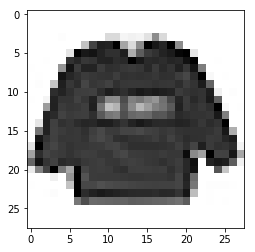

In [4]:
# printing the array representation of the first image
print("the array of the first image looks like", all_images[0])

# printing something that actually looks like an image
print("and the actual image looks like")
plt.imshow(all_images[0].reshape(28,28),  cmap='Greys')
plt.show()

In [5]:
# Deciding how many nodes wach layer should have

n_nodes_inpl = 784  #encoder
n_nodes_hl1  = 32  #encoder

n_nodes_hl2  = 32  #decoder
n_nodes_outl = 784  #decoder

In [6]:
# first hidden layer has 784*32 weights and 32 biases
hidden_1_layer_vals = {
    'weights': tf.Variable(tf.random_normal([n_nodes_inpl, n_nodes_hl1])),
    'biases': tf.Variable(tf.random_normal([n_nodes_hl1]))
}

# second hidden layer has 32*32 weights and 32 biases
hidden_2_layer_vals = {
    'weights': tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
    'biases': tf.Variable(tf.random_normal([n_nodes_hl2]))
}

# second hidden layer has 32*784 weights and 784 biases
output_layer_vals = {
    'weights': tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_outl])),
    'biases': tf.Variable(tf.random_normal([n_nodes_outl]))    
}


In [7]:
# image with shape 784 goes in
input_layer = tf.placeholder('float', [None, 784])

# multiply output of input_layer wth a weight matrix and add biases
layer_1 = tf.nn.sigmoid(
       tf.add(tf.matmul(input_layer,hidden_1_layer_vals['weights']),
       hidden_1_layer_vals['biases']))

# multiply output of layer_1 wth a weight matrix and add biases
layer_2 = tf.nn.sigmoid(
       tf.add(tf.matmul(layer_1,hidden_2_layer_vals['weights']),
       hidden_2_layer_vals['biases']))

# multiply output of layer_2 wth a weight matrix and add biases
output_layer = tf.add(tf.matmul(layer_2,output_layer_vals['weights']),
               output_layer_vals['biases'])
    
# output_true shall have the original image for error calculations
output_true = tf.placeholder('float', [None, 784])

# define our cost function
meansq = tf.reduce_mean(tf.square(output_layer - output_true))

# define our optimizer
learn_rate = 0.1   # how fast the model should learn
optimizer = tf.train.AdagradOptimizer(learn_rate).minimize(meansq)

In [8]:
# initialising stuff and starting the session

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# defining bath size, number of epochs and learning rate
batch_size = 100 
total_epochs = 2000
tot_images = 60000

# running the model for a 1000 epochs taking 100 images in batches
# total improvement is printed out after each epoch
for epoch in range(total_epochs):
    epoch_loss = 0
    for i in range(int(tot_images/batch_size)):
        epoch_x = all_images[i*batch_size : (i+1)*batch_size]    
        _, c = sess.run([optimizer, meansq], feed_dict={input_layer:epoch_x, 
                                                        output_true:epoch_x})
        epoch_loss += c
    
    print('Epoch', epoch, '/', total_epochs, 'loss:', epoch_loss)    
    

Epoch 0 / 2000 loss: 4468861.138183594
Epoch 1 / 2000 loss: 3295135.5439453125
Epoch 2 / 2000 loss: 2967538.0268554688
Epoch 3 / 2000 loss: 2775380.3029785156
Epoch 4 / 2000 loss: 2632790.9416503906
Epoch 5 / 2000 loss: 2527587.1174316406
Epoch 6 / 2000 loss: 2444726.215576172
Epoch 7 / 2000 loss: 2381179.649658203
Epoch 8 / 2000 loss: 2304322.5595703125
Epoch 9 / 2000 loss: 2253916.96875
Epoch 10 / 2000 loss: 2211005.86328125
Epoch 11 / 2000 loss: 2176310.161376953
Epoch 12 / 2000 loss: 2147287.7919921875
Epoch 13 / 2000 loss: 2132616.2119140625
Epoch 14 / 2000 loss: 2104770.309326172
Epoch 15 / 2000 loss: 2069716.8305664062
Epoch 16 / 2000 loss: 2063243.0827636719
Epoch 17 / 2000 loss: 2038372.3984375
Epoch 18 / 2000 loss: 2025746.4479980469
Epoch 19 / 2000 loss: 2031155.8679199219
Epoch 20 / 2000 loss: 1997155.1921386719
Epoch 21 / 2000 loss: 1976972.7966308594
Epoch 22 / 2000 loss: 1962942.9287109375
Epoch 23 / 2000 loss: 1960194.0959472656
Epoch 24 / 2000 loss: 1939764.1328125
Epo

Epoch 199 / 2000 loss: 1430543.9077148438
Epoch 200 / 2000 loss: 1426517.7368164062
Epoch 201 / 2000 loss: 1426551.0849609375
Epoch 202 / 2000 loss: 1427973.2883300781
Epoch 203 / 2000 loss: 1425900.7399902344
Epoch 204 / 2000 loss: 1426898.4047851562
Epoch 205 / 2000 loss: 1427411.5837402344
Epoch 206 / 2000 loss: 1427833.8823242188
Epoch 207 / 2000 loss: 1425079.7062988281
Epoch 208 / 2000 loss: 1428262.0654296875
Epoch 209 / 2000 loss: 1424495.8540039062
Epoch 210 / 2000 loss: 1422545.0739746094
Epoch 211 / 2000 loss: 1421771.1813964844
Epoch 212 / 2000 loss: 1420717.0048828125
Epoch 213 / 2000 loss: 1419915.1506347656
Epoch 214 / 2000 loss: 1422502.9482421875
Epoch 215 / 2000 loss: 1420975.9904785156
Epoch 216 / 2000 loss: 1416599.7587890625
Epoch 217 / 2000 loss: 1417587.0808105469
Epoch 218 / 2000 loss: 1415267.8203125
Epoch 219 / 2000 loss: 1413519.0444335938
Epoch 220 / 2000 loss: 1414898.5017089844
Epoch 221 / 2000 loss: 1414122.7475585938
Epoch 222 / 2000 loss: 1417490.219238

Epoch 395 / 2000 loss: 1350175.8084716797
Epoch 396 / 2000 loss: 1349842.2609863281
Epoch 397 / 2000 loss: 1350172.5938720703
Epoch 398 / 2000 loss: 1349452.2980957031
Epoch 399 / 2000 loss: 1350022.0684814453
Epoch 400 / 2000 loss: 1350110.4239501953
Epoch 401 / 2000 loss: 1348839.25390625
Epoch 402 / 2000 loss: 1348367.047241211
Epoch 403 / 2000 loss: 1348769.4208984375
Epoch 404 / 2000 loss: 1350960.4536132812
Epoch 405 / 2000 loss: 1349131.8071289062
Epoch 406 / 2000 loss: 1349127.4504394531
Epoch 407 / 2000 loss: 1349506.717163086
Epoch 408 / 2000 loss: 1350548.4698486328
Epoch 409 / 2000 loss: 1351370.2731933594
Epoch 410 / 2000 loss: 1352226.3706054688
Epoch 411 / 2000 loss: 1350512.3389892578
Epoch 412 / 2000 loss: 1348783.187133789
Epoch 413 / 2000 loss: 1349571.422241211
Epoch 414 / 2000 loss: 1346280.0318603516
Epoch 415 / 2000 loss: 1346339.2712402344
Epoch 416 / 2000 loss: 1345719.7302246094
Epoch 417 / 2000 loss: 1345276.3361816406
Epoch 418 / 2000 loss: 1347057.843627929

Epoch 592 / 2000 loss: 1318167.0321044922
Epoch 593 / 2000 loss: 1315858.1169433594
Epoch 594 / 2000 loss: 1314568.8563232422
Epoch 595 / 2000 loss: 1314715.3072509766
Epoch 596 / 2000 loss: 1316259.972290039
Epoch 597 / 2000 loss: 1318009.8649902344
Epoch 598 / 2000 loss: 1319180.6444091797
Epoch 599 / 2000 loss: 1317850.9968261719
Epoch 600 / 2000 loss: 1316921.8837890625
Epoch 601 / 2000 loss: 1317357.197631836
Epoch 602 / 2000 loss: 1317044.7392578125
Epoch 603 / 2000 loss: 1314335.3548583984
Epoch 604 / 2000 loss: 1314253.9477539062
Epoch 605 / 2000 loss: 1315575.5935058594
Epoch 606 / 2000 loss: 1314592.716796875
Epoch 607 / 2000 loss: 1313268.1824951172
Epoch 608 / 2000 loss: 1314568.449584961
Epoch 609 / 2000 loss: 1314468.0646972656
Epoch 610 / 2000 loss: 1314649.6372070312
Epoch 611 / 2000 loss: 1317051.6856689453
Epoch 612 / 2000 loss: 1314456.3991699219
Epoch 613 / 2000 loss: 1316519.0128173828
Epoch 614 / 2000 loss: 1314290.8758544922
Epoch 615 / 2000 loss: 1312144.5614013

Epoch 789 / 2000 loss: 1293815.1086425781
Epoch 790 / 2000 loss: 1293545.2122802734
Epoch 791 / 2000 loss: 1293984.4545898438
Epoch 792 / 2000 loss: 1292560.810913086
Epoch 793 / 2000 loss: 1293302.1552734375
Epoch 794 / 2000 loss: 1293561.9006347656
Epoch 795 / 2000 loss: 1292651.2512207031
Epoch 796 / 2000 loss: 1293309.78125
Epoch 797 / 2000 loss: 1294311.0876464844
Epoch 798 / 2000 loss: 1295790.9205322266
Epoch 799 / 2000 loss: 1295038.7630615234
Epoch 800 / 2000 loss: 1292199.1162109375
Epoch 801 / 2000 loss: 1292337.2927246094
Epoch 802 / 2000 loss: 1292019.9302978516
Epoch 803 / 2000 loss: 1292537.128540039
Epoch 804 / 2000 loss: 1292799.6586914062
Epoch 805 / 2000 loss: 1293437.1220703125
Epoch 806 / 2000 loss: 1291580.9658203125
Epoch 807 / 2000 loss: 1292556.9147949219
Epoch 808 / 2000 loss: 1293365.3341064453
Epoch 809 / 2000 loss: 1292777.0931396484
Epoch 810 / 2000 loss: 1291599.873046875
Epoch 811 / 2000 loss: 1291228.5498046875
Epoch 812 / 2000 loss: 1291834.3763427734


Epoch 986 / 2000 loss: 1276898.5557861328
Epoch 987 / 2000 loss: 1276409.8642578125
Epoch 988 / 2000 loss: 1276838.2547607422
Epoch 989 / 2000 loss: 1275862.4108886719
Epoch 990 / 2000 loss: 1275720.8177490234
Epoch 991 / 2000 loss: 1276204.8032226562
Epoch 992 / 2000 loss: 1275974.9790039062
Epoch 993 / 2000 loss: 1277241.2446289062
Epoch 994 / 2000 loss: 1276392.8029785156
Epoch 995 / 2000 loss: 1275955.9342041016
Epoch 996 / 2000 loss: 1276736.2239990234
Epoch 997 / 2000 loss: 1276610.425415039
Epoch 998 / 2000 loss: 1276731.2524414062
Epoch 999 / 2000 loss: 1279276.3685302734
Epoch 1000 / 2000 loss: 1277849.476928711
Epoch 1001 / 2000 loss: 1276152.5378417969
Epoch 1002 / 2000 loss: 1274940.1926269531
Epoch 1003 / 2000 loss: 1275960.1798095703
Epoch 1004 / 2000 loss: 1276271.6010742188
Epoch 1005 / 2000 loss: 1275972.552368164
Epoch 1006 / 2000 loss: 1275532.5037841797
Epoch 1007 / 2000 loss: 1275888.6024169922
Epoch 1008 / 2000 loss: 1276654.408203125
Epoch 1009 / 2000 loss: 12780

Epoch 1179 / 2000 loss: 1265237.970703125
Epoch 1180 / 2000 loss: 1266262.0258789062
Epoch 1181 / 2000 loss: 1265653.4635009766
Epoch 1182 / 2000 loss: 1266518.5556640625
Epoch 1183 / 2000 loss: 1265890.3054199219
Epoch 1184 / 2000 loss: 1264945.2021484375
Epoch 1185 / 2000 loss: 1265527.1940917969
Epoch 1186 / 2000 loss: 1264966.4338378906
Epoch 1187 / 2000 loss: 1266205.5653076172
Epoch 1188 / 2000 loss: 1265553.1787109375
Epoch 1189 / 2000 loss: 1265297.4138183594
Epoch 1190 / 2000 loss: 1264041.933959961
Epoch 1191 / 2000 loss: 1264736.348022461
Epoch 1192 / 2000 loss: 1263878.2322998047
Epoch 1193 / 2000 loss: 1265630.3963623047
Epoch 1194 / 2000 loss: 1264729.1193847656
Epoch 1195 / 2000 loss: 1264491.4149169922
Epoch 1196 / 2000 loss: 1264840.4908447266
Epoch 1197 / 2000 loss: 1263082.2646484375
Epoch 1198 / 2000 loss: 1263021.3916015625
Epoch 1199 / 2000 loss: 1263443.6795654297
Epoch 1200 / 2000 loss: 1263894.1607666016
Epoch 1201 / 2000 loss: 1265028.904663086
Epoch 1202 / 20

Epoch 1371 / 2000 loss: 1255589.4914550781
Epoch 1372 / 2000 loss: 1254575.5026855469
Epoch 1373 / 2000 loss: 1255087.9587402344
Epoch 1374 / 2000 loss: 1254872.0502929688
Epoch 1375 / 2000 loss: 1255619.349609375
Epoch 1376 / 2000 loss: 1254159.1776123047
Epoch 1377 / 2000 loss: 1254454.9669189453
Epoch 1378 / 2000 loss: 1254993.9075927734
Epoch 1379 / 2000 loss: 1254677.4090576172
Epoch 1380 / 2000 loss: 1254424.6965332031
Epoch 1381 / 2000 loss: 1254176.6729736328
Epoch 1382 / 2000 loss: 1254466.1158447266
Epoch 1383 / 2000 loss: 1254228.9243164062
Epoch 1384 / 2000 loss: 1253414.0950927734
Epoch 1385 / 2000 loss: 1253123.9576416016
Epoch 1386 / 2000 loss: 1253545.1163330078
Epoch 1387 / 2000 loss: 1253242.810180664
Epoch 1388 / 2000 loss: 1253090.5821533203
Epoch 1389 / 2000 loss: 1252419.1169433594
Epoch 1390 / 2000 loss: 1252971.033569336
Epoch 1391 / 2000 loss: 1256057.9645996094
Epoch 1392 / 2000 loss: 1253887.8634033203
Epoch 1393 / 2000 loss: 1253706.6389160156
Epoch 1394 / 2

Epoch 1563 / 2000 loss: 1246506.8509521484
Epoch 1564 / 2000 loss: 1247242.0360107422
Epoch 1565 / 2000 loss: 1246165.5197753906
Epoch 1566 / 2000 loss: 1249268.180053711
Epoch 1567 / 2000 loss: 1246824.7330322266
Epoch 1568 / 2000 loss: 1246139.2143554688
Epoch 1569 / 2000 loss: 1246154.0700683594
Epoch 1570 / 2000 loss: 1245734.8623046875
Epoch 1571 / 2000 loss: 1246491.505859375
Epoch 1572 / 2000 loss: 1246557.2939453125
Epoch 1573 / 2000 loss: 1245824.2783203125
Epoch 1574 / 2000 loss: 1246073.1538085938
Epoch 1575 / 2000 loss: 1245649.607055664
Epoch 1576 / 2000 loss: 1246069.1779785156
Epoch 1577 / 2000 loss: 1246085.90234375
Epoch 1578 / 2000 loss: 1245587.115234375
Epoch 1579 / 2000 loss: 1245831.5400390625
Epoch 1580 / 2000 loss: 1246333.9235839844
Epoch 1581 / 2000 loss: 1246300.6171875
Epoch 1582 / 2000 loss: 1245681.0528564453
Epoch 1583 / 2000 loss: 1245180.8156738281
Epoch 1584 / 2000 loss: 1245405.0903320312
Epoch 1585 / 2000 loss: 1245153.0887451172
Epoch 1586 / 2000 lo

Epoch 1755 / 2000 loss: 1240662.5920410156
Epoch 1756 / 2000 loss: 1241697.5495605469
Epoch 1757 / 2000 loss: 1241110.9389648438
Epoch 1758 / 2000 loss: 1241535.763305664
Epoch 1759 / 2000 loss: 1240900.0808105469
Epoch 1760 / 2000 loss: 1239731.4713134766
Epoch 1761 / 2000 loss: 1239368.1440429688
Epoch 1762 / 2000 loss: 1239814.02734375
Epoch 1763 / 2000 loss: 1240733.8927001953
Epoch 1764 / 2000 loss: 1240115.5670166016
Epoch 1765 / 2000 loss: 1240166.8956298828
Epoch 1766 / 2000 loss: 1239756.9720458984
Epoch 1767 / 2000 loss: 1240090.615234375
Epoch 1768 / 2000 loss: 1240468.2956542969
Epoch 1769 / 2000 loss: 1239141.128540039
Epoch 1770 / 2000 loss: 1240072.0534667969
Epoch 1771 / 2000 loss: 1240222.8005371094
Epoch 1772 / 2000 loss: 1239044.0004882812
Epoch 1773 / 2000 loss: 1239188.9086914062
Epoch 1774 / 2000 loss: 1239435.7717285156
Epoch 1775 / 2000 loss: 1240090.5144042969
Epoch 1776 / 2000 loss: 1239404.5506591797
Epoch 1777 / 2000 loss: 1239570.5021972656
Epoch 1778 / 200

Epoch 1947 / 2000 loss: 1235196.2736816406
Epoch 1948 / 2000 loss: 1235397.3287353516
Epoch 1949 / 2000 loss: 1236323.564086914
Epoch 1950 / 2000 loss: 1237283.9797363281
Epoch 1951 / 2000 loss: 1237057.4464111328
Epoch 1952 / 2000 loss: 1237319.0283203125
Epoch 1953 / 2000 loss: 1237795.1375732422
Epoch 1954 / 2000 loss: 1236939.7014160156
Epoch 1955 / 2000 loss: 1236304.9733886719
Epoch 1956 / 2000 loss: 1235615.5705566406
Epoch 1957 / 2000 loss: 1234895.9926757812
Epoch 1958 / 2000 loss: 1235053.4331054688
Epoch 1959 / 2000 loss: 1234297.2358398438
Epoch 1960 / 2000 loss: 1234155.8614501953
Epoch 1961 / 2000 loss: 1234636.2912597656
Epoch 1962 / 2000 loss: 1234163.680053711
Epoch 1963 / 2000 loss: 1234852.8680419922
Epoch 1964 / 2000 loss: 1234013.3679199219
Epoch 1965 / 2000 loss: 1233554.0115966797
Epoch 1966 / 2000 loss: 1233156.7758789062
Epoch 1967 / 2000 loss: 1233728.9569091797
Epoch 1968 / 2000 loss: 1233194.2893066406
Epoch 1969 / 2000 loss: 1233795.7905273438
Epoch 1970 / 

In [11]:
# pick any image
test_image = all_images[999]
# run it though the autoencoder
output_test_image = sess.run(output_layer, feed_dict={input_layer:[test_image]})
# run it though just the encoder
encoded_any_image = sess.run(layer_1, feed_dict={input_layer:[test_image]})

# print the encoding
print(encoded_any_image)

[[1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0.]]


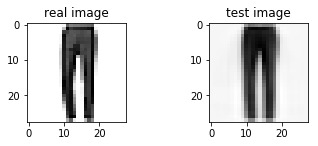

In [13]:
plt.subplot(2,2,1)
plt.imshow(test_image.reshape(28,28), cmap='Greys')
plt.title('real image')

plt.subplot(2,2,2)
plt.imshow(output_test_image.reshape(28,28), cmap='Greys')
plt.title('test image')

plt.show()